In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline



np.warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(style="whitegrid")

# Beautiful plot scheme
#plt.style.use('fivethirtyeight')
plt.show()

basePath='/Users/ajaychauhan/Documents/IT Bodhi/ITbodhi/Machine_Learning/datasets/titanic/'
trainDataFilePath = basePath+'/train.csv'
#testDataFilePath = basePath+'/test.csv'

train = pd.read_csv(trainDataFilePath)
#test = pd.read_csv(testDataFilePath)


In [23]:
# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

In [24]:
#Data Exploration

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
#Data Exploration

train.shape

(891, 12)

In [26]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [27]:
# Statistical Summary of Continuous Variables:

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
#categorical variables:

categorical = train.dtypes[train.dtypes == "object"].index

print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [29]:
train[categorical].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johannesen-Bratthammer, Mr. Bernt",male,1601,B96 B98,S
freq,1,577,7,4,644


In [30]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

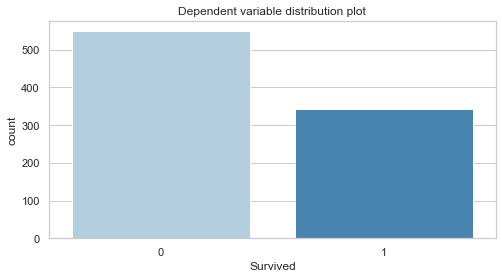

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(train['Survived'],palette='Blues')
plt.title('Dependent variable distribution plot')
plt.xlabel('Survived')

train['Survived'].value_counts()

In [32]:
train.loc[train["Pclass"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


The categorical variable summary shows the count of non-NaN records, the number of unique categories, 
the most frequently occurring value and the number of occurrences of the most frequent value.

<B> Questions to consider </B>

Do I need all of the variables?

Should I transform any variables?

Are there NA values, outliers or other strange values?

Should I create new variables?


Features that describe data(passengers in this case) numerically or group them into a few broad categories could be useful for predicting.
The variables Pclass, Sex, Age, SibSp, Parch, Fare and Embarked appear to fit this description


Passenger ID is just a number assigned to each passenger. It is nothing more than an arbitrary identifier

In [33]:
#passenger id column is not needed . let's drop it
train.drop(['PassengerId'], axis=1,inplace=True)

In [34]:
#Lets explore Name variable

sorted(train["Name"])[0:20]   # Check the first 20 sorted names


['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton',
 'Allen, Mr. William Henry',
 'Allison, Master. Hudson Trevor',
 'Allison, Miss. Helen Loraine',
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
 'Allum, Mr. Owen George']

In [35]:
train["Name"].describe()


count                                   891
unique                                  891
top       Johannesen-Bratthammer, Mr. Bernt
freq                                      1
Name: Name, dtype: object

* Name variable has 889 unique values. Since there are 889 rows in the data set we know each name is unique. 
* It appears that married women have their maiden names listed in parentheses. 
* In general, a categorical variable that is unique to each case isn't useful for prediction.


* Name doesnt qualify for a variable to be used for predicting. It wil be used only for reporting final output
#### drop Name Cloumn

In [36]:
#Name id column is unique . let's drop it
train.drop(['Name'], axis=1,inplace=True)

### EDA-VISUALIZATION
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

- maximize insight into a data set;
- uncover underlying structure;
- extract important variables;
- detect outliers and anomalies;
- Handle Missing value
- Removing duplicates
- Normalizing and Scaling( Numerical Variables)
- Encoding Categorical variables( Dummy Variables)
- Bivariate Analysis
- test underlying assumptions;
- develop parsimonious models; 

There are four primary types of EDA:

**Univariate non-graphical**  This is simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it.

**Univariate graphical** Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. Common types of univariate graphics include:
- Stem-and-leaf plots, which show all data values and the shape of the distribution.
- Histograms, a bar plot in which each bar represents the frequency (count) or proportion (count/total count) of cases for a range of values.
- * Box plots, which graphically depict the five-number summary of minimum, first quartile, median, third quartile, and maximum.

**Multivariate nongraphical** Multivariate data arises from more than one variable. Multivariate non-graphical EDA techniques generally show the relationship between two or more variables of the data through cross-tabulation or statistics.
**Multivariate graphical** Multivariate data uses graphics to display relationships between two or more sets of data. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.
Other common types of multivariate graphics include:

- Scatter plot, which is used to plot data points on a horizontal and a vertical axis to show how much one variable is affected by another.
- Multivariate chart, which is a graphical representation of the relationships between factors and a response.
- Run chart, which is a line graph of data plotted over time.
- Bubble chart, which is a data visualization that displays multiple circles (bubbles) in a two-dimensional plot.
- Heat map, which is a graphical representation of data where values are depicted by color.

### Bivariate Analysis

When we talk about bivariate analysis, it means analyzing 2 variables. Since we know there are numerical and categorical variables, there is a way of analyzing these variables as shown below:

Numerical vs. Numerical

1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

Categorical vs. Numerical

1. Bar chart
2. Violin plot
3. Categorical box plot
4.Swarm plot

Two Categorical Variables

1. Bar chart
2. Grouped bar chart
3. Point plot

#### CORELATION MATRIX
* LOGISTIC REGRESSION ASSUMPTION: NO Collinerity among the Predictors..CHECK AND REMOVE

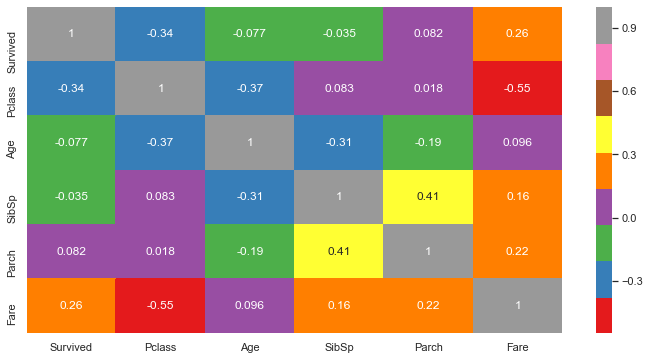

In [37]:
cor = train.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

#### Histogram
A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable

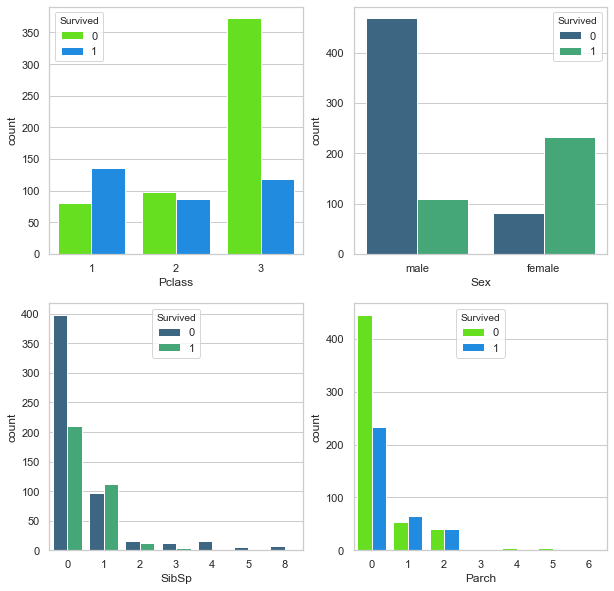

In [38]:
fig ,ax = plt.subplots(2,2,figsize=(10,10))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=train,x='Pclass',hue='Survived',palette='gist_rainbow',ax=ax1)
sns.countplot(data=train,x='Sex',hue='Survived',palette='viridis',ax=ax2)
sns.countplot(data=train,x='SibSp',hue='Survived',palette='viridis',ax=ax3)
sns.countplot(data=train,x='Parch',hue='Survived',palette='gist_rainbow',ax=ax4)

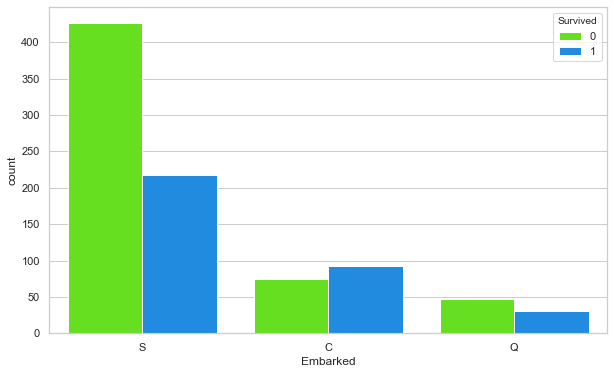

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data=train,x='Embarked',hue='Survived',palette='gist_rainbow')

#### Graph Boxplot
A boxplot is used below to analyze the relationship between a categorical feature (malignant or benign tumor) and a continuous feature (area_mean).

#### Violin Plot
In general, violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a density plot.


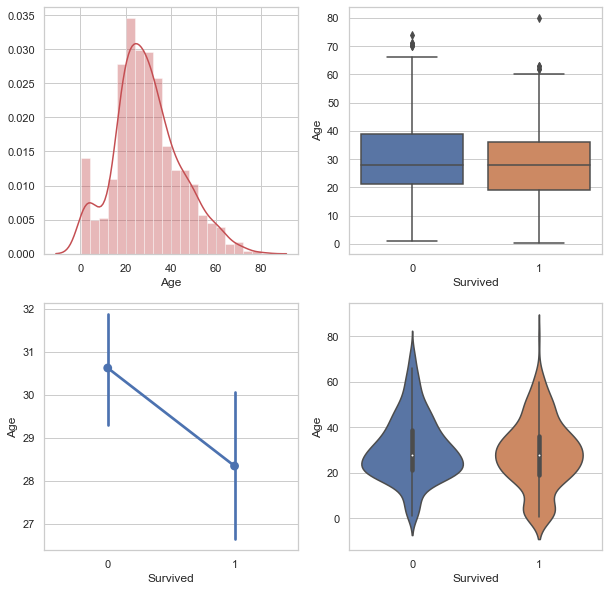

In [40]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['Age'],bins=20,color='r',ax=ax1)
sns.boxplot(y='Age',x='Survived',data=train,ax=ax2)
sns.pointplot(y='Age',x='Survived',data=train,ax=ax3)
sns.violinplot(y='Age',x='Survived',data=train,ax=ax4)

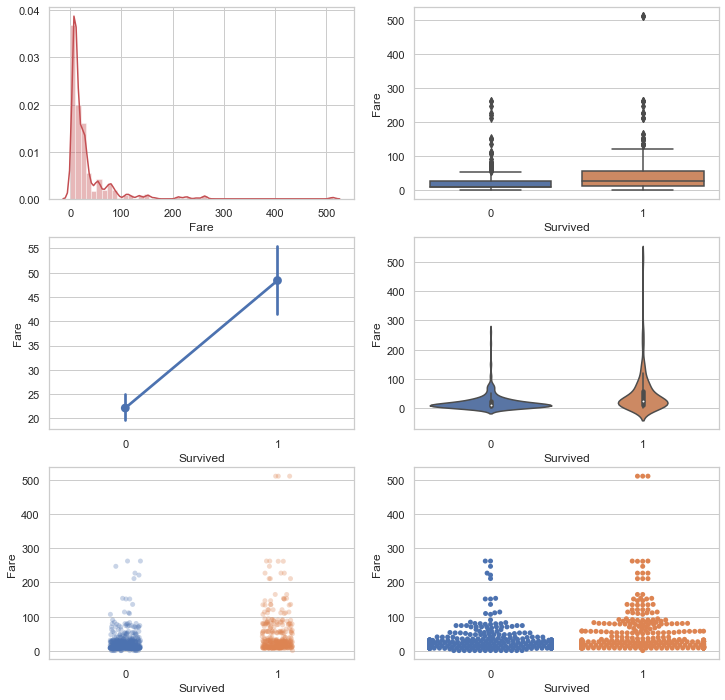

In [41]:
fig,ax = plt.subplots(3,2,figsize = (12,12))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.distplot(train['Fare'],bins=50,color='r',ax=ax1)
sns.boxplot(y='Fare',x='Survived',data=train,ax=ax2)
sns.pointplot(y='Fare',x='Survived',data=train,ax=ax3)
sns.violinplot(y='Fare',x='Survived',data=train,ax=ax4)
sns.stripplot(y='Fare',x='Survived',data=train,alpha=0.3,ax=ax5)
sns.swarmplot(x='Survived', y='Fare', data=train,ax=ax6)

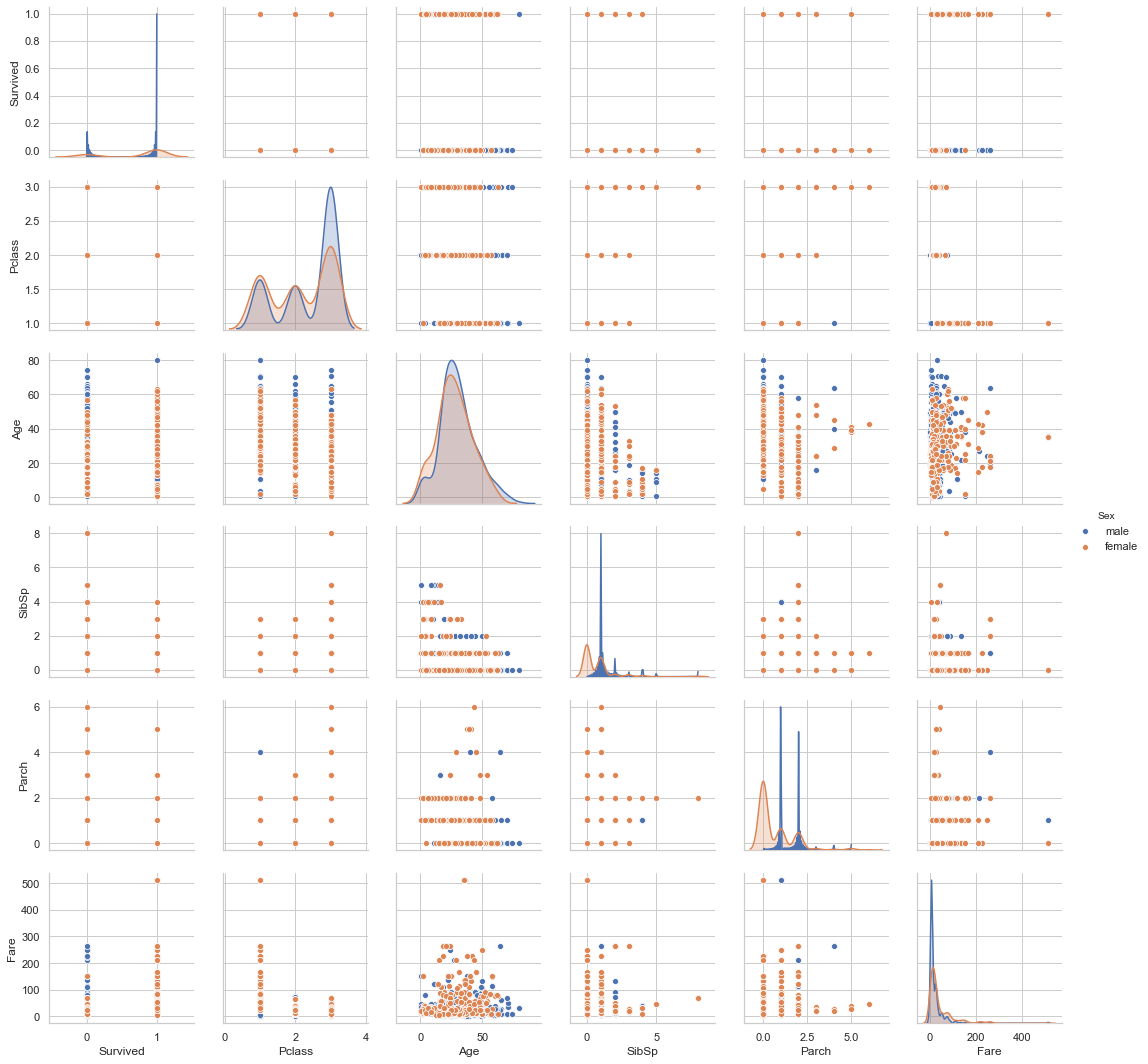

In [42]:
sns.pairplot(train, hue="Sex")

In [43]:
#Lets explore "Ticket"

train["Ticket"][0:15]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [44]:
train["Ticket"].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

* Ticket has 680 unique values: almost as many as there are passengers. 
* Categorical variables with almost as many levels as there are records are generally not very useful for prediction. 
#### Drop Name Cloumn

In [45]:
#Name id column is unique . let's drop it
train.drop(['Ticket'], axis=1,inplace=True)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## Handling Missing Values

In [47]:
# Missing Values

k= pd.DataFrame()
k['train']= train.isnull().sum()

k.T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
train,0,0,0,177,0,0,0,687,2


In [48]:
#Lets explore Cabin

train["Cabin"][0:15]


0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [49]:
train["Cabin"].describe()  # Check number of unique cabins


count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

Cabin also has 145 unique values, which indicates it may not be particularly useful for prediction. 
On the other hand, the names of the levels for the cabin variable seem to have a regular structure: each starts with a capital letter followed by a number. We could use that structure to reduce the number of levels to make categories large enough that they might be useful for prediction.

In [50]:
train["Cabin"].value_counts()   # Check unique cabins


B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
D21            1
C82            1
C101           1
B50            1
B19            1
Name: Cabin, Length: 147, dtype: int64

In [51]:
char_cabin = train["Cabin"].astype(str) # Convert data to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin.describe()


,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


#### We have created a new category for the missing values

In [52]:
train["Cabin"] = new_Cabin


In [53]:
train["Cabin"].describe() 


count     891
unique      9
top         n
freq      687
Name: Cabin, dtype: object

#### Let's check if any relationship in Cabin and fare cloumn so that we can use Fare cloumn for replacing Cabin missing values

In [54]:
temp = train[train.Cabin.notnull()][["Cabin","Fare"]].sort_values(by = "Fare", ascending= False)

In [55]:
temp.head(10)

,Cabin,Fare
258,n,512.3292
737,B,512.3292
679,B,512.3292
88,C,263.0000
27,C,263.0000
341,C,263.0000
438,C,263.0000
311,B,262.3750
742,B,262.3750
118,B,247.5208


* No Relationship Found between Cabin and Fare Cloumn

#### Let's check if any relationship in Cabin and PClass cloumn so that we can use Pclass cloumn for replacing Cabin missing values

In [56]:
train["Pclass"].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [57]:
temp1 = train[train.Cabin.notnull()][["Cabin","Pclass"]].sort_values(by = "Pclass", ascending= False)

In [58]:
# No of passengers survived vs dead

train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [59]:
temp1.head(20)

,Cabin,Pclass
0,n,3
511,n,3
500,n,3
501,n,3
502,n,3
503,n,3
508,n,3
509,n,3
510,n,3
514,n,3


* No Relationship Found between Pclass and Fare Cloumn

#### Handling Missing values for Age Column

In [60]:
# Missing Values

k= pd.DataFrame()
k['train']= train.isnull().sum()

#k.T
k

#train.apply(lambda x: sum(x.isnull()))

,train
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa42bc68e90>]],
      dtype=object)

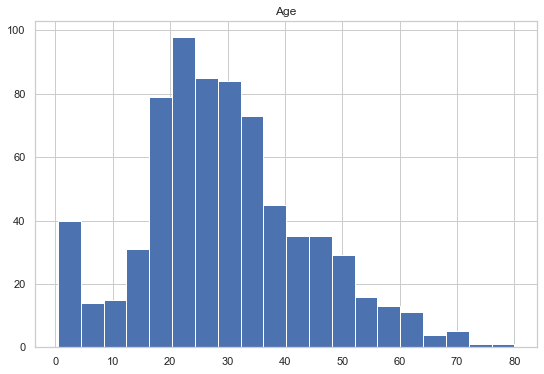

In [61]:
train.hist(column='Age', figsize=(9,6), bins=20)  

In [62]:
# duplicate column values data
#duplicate = train[train.duplicated('Ticket')]
#df=duplicate.loc[duplicate['Ticket'] == 19950]-== '349909'
#duplicate.loc[duplicate['Cabin'].isnull()]


## Age VS Gender

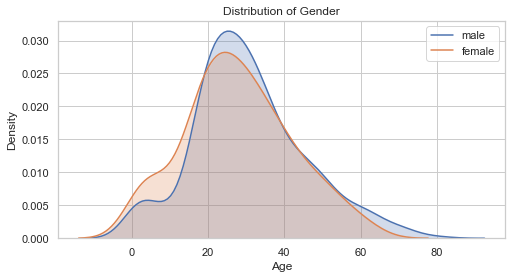

In [63]:
np.warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 4))
sns.kdeplot(train.loc[train['Sex'] == 'male', 'Age'], label = 'male',shade=True)
sns.kdeplot(train.loc[train['Sex'] == 'female', 'Age'], label = 'female',shade=True)

# Labeling of plot
plt.xlabel('Age'); plt.ylabel('Density'); plt.title('Distribution of Gender');

# Age VS Survival

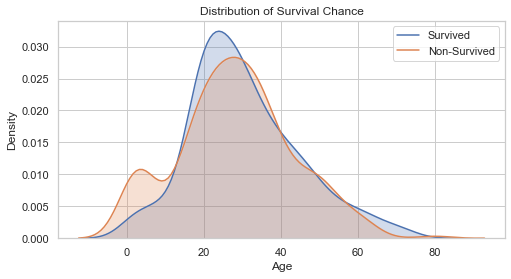

In [64]:
np.warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 4))
sns.kdeplot(train.loc[train['Survived'] == 0, 'Age'], label = 'Survived',shade=True)
sns.kdeplot(train.loc[train['Survived'] == 1, 'Age'], label = 'Non-Survived',shade=True)

# Labeling of plot
plt.xlabel('Age'); plt.ylabel('Density'); plt.title('Distribution of Survival Chance');

In [65]:
#Replace missing Age with Medain Value
train["Age"] = train["Age"].fillna(train["Age"].median())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa42bf45ed0>]],
      dtype=object)

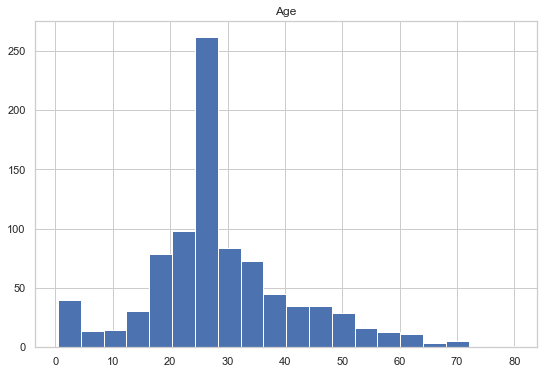

In [66]:
train.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

#### Handling Missing values for Embarked Column

In [67]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
train['Embarked'].isnull().sum()

2

In [69]:
train[train.Embarked.isnull()] 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B,NaN
829,1,1,female,62.0,0,0,80.0,B,NaN


In [70]:
train.loc[(train.Sex =='female') & (train.Pclass == 1) & (train.SibSp == 0) & (train.Parch == 0) & (train.Fare >= 80)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0000,B,NaN
195,1,1,female,58.0,0,0,146.5208,B,C
257,1,1,female,30.0,0,0,86.5000,B,S
258,1,1,female,35.0,0,0,512.3292,n,C
269,1,1,female,35.0,0,0,135.6333,C,S
306,1,1,female,28.0,0,0,110.8833,n,C
310,1,1,female,24.0,0,0,83.1583,C,C
325,1,1,female,36.0,0,0,135.6333,C,C
337,1,1,female,41.0,0,0,134.5000,E,C
380,1,1,female,42.0,0,0,227.5250,n,C


#### Vale compelely missing at Random
* Replacing missing vales at Embarked cloumn with Mode

from pandas_profiling import ProfileReport
profile = ProfileReport(train, title='Pandas Profiling Report', explorative=True)
profile

In [71]:
#Impute the missing values with most common value
train["Embarked"] = train ["Embarked"].fillna('S')


In [72]:
train["Cabin"][train["Survived"] == 0].isnull().sum()

0

In [73]:
# Proportion of passengers survived vs dead

train["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [74]:
# Absolute numbers of Survived male passengers by their Gender

train["Survived"][train["Sex"] == 'male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [75]:
# Proportion of Survived male passengers by their Gender

train["Survived"][train["Sex"] == 'male'].value_counts(normalize=True)


0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [76]:
train.groupby(["Sex","Survived"]).size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [77]:
train.pivot_table(index="Sex", values=["Survived"], aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


* In cases where you have a lot of data and only a few missing values, it might make sense to simply delete records with missing values present. 
* On the other hand, if you have more than a handful of missing values, removing records with missing values could cause you to get rid of a lot of data. 
* Missing values in categorical data are not particularly troubling because you can simply treat NA as an additional category.
* Missing values in numeric variables are more troublesome, since you can't just treat a missing value as number.

In [78]:
#### Making single feature using SibSp and Parch

In [79]:
#Feature Engineering

train["Family"] = train["SibSp"] + train["Parch"]

In [80]:
#Name id column is unique . let's drop it
train.drop(['SibSp','Parch'], axis=1,inplace=True)
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,7.2500,n,S,1
1,1,1,female,38.0,71.2833,C,C,1
2,1,3,female,26.0,7.9250,n,S,0
3,1,1,female,35.0,53.1000,C,S,1
4,0,3,male,35.0,8.0500,n,S,0


In [81]:
unwanted = ['Survived','Cabin']
Y = train['Survived']
X = train.drop(unwanted,axis=1)

In [82]:
X.head(5)

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


In [83]:
Y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [84]:
#ONE HOT ENCODING - Convert the categorical variables into integers
X = pd.get_dummies(X)

In [85]:
X.head(5)

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,1,0,1,0,0,1
1,1,38.0,71.2833,1,1,0,1,0,0
2,3,26.0,7.9250,0,1,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,0,1
4,3,35.0,8.0500,0,0,1,0,0,1


In [86]:
#Scaling the numerical data:
from sklearn.preprocessing import StandardScaler
ss_scaler = StandardScaler()
X_scaled = ss_scaler.fit_transform(X)
X_Features = pd.DataFrame(X_scaled,columns = X.columns)
X_Features.head(5)

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.565736,-0.502445,0.059160,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.663861,0.786845,0.059160,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.258337,-0.488854,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.433312,0.420730,0.059160,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.433312,-0.486337,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,0.615838


In [87]:
X_Features.shape

(891, 9)

## Check outliers

In [88]:
#Combine Sale price to check outliers
X_Features= pd.concat([X_Features, Y], axis=1)

In [89]:
#Using Isolation Forest
from sklearn.ensemble import IsolationForest

isoClf = IsolationForest(n_estimators=10, warm_start=True,contamination=.1)
isoClf.fit(X_Features)
output_isof = pd.DataFrame(isoClf.predict(X_Features),columns=['y'])

In [90]:
output_isof['y'].value_counts()

 1    802
-1     89
Name: y, dtype: int64

In [91]:
X_features_outliers = pd.concat([output_isof, X_Features], axis=1)
X_features_outliers.head(5)

,y,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,0.827377,-0.565736,-0.502445,0.059160,-0.737695,0.737695,-0.482043,-0.307562,0.615838,0
1,1,-1.566107,0.663861,0.786845,0.059160,1.355574,-1.355574,2.074505,-0.307562,-1.623803,1
2,1,0.827377,-0.258337,-0.488854,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,0.615838,1
3,1,-1.566107,0.433312,0.420730,0.059160,1.355574,-1.355574,-0.482043,-0.307562,0.615838,1
4,1,0.827377,0.433312,-0.486337,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,0.615838,0


In [92]:
X_features_outliers.shape

(891, 11)

In [93]:
X_features_F = X_features_outliers[X_features_outliers.y==1]

In [94]:
X_features_F.shape

(802, 11)

In [95]:
Y_label = X_features_F['Survived']
X_data = X_features_F.drop('Survived',axis=1)

In [96]:
X_data.head(5)

,y,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.827377,-0.565736,-0.502445,0.059160,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,1,-1.566107,0.663861,0.786845,0.059160,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,1,0.827377,-0.258337,-0.488854,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,1,-1.566107,0.433312,0.420730,0.059160,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,1,0.827377,0.433312,-0.486337,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,0.615838


In [97]:
X_data.shape

(802, 10)

### Assignment: Do train-Test Split and train and test model

In [98]:
# Using Logistic Regression

#Note that regularization is applied by default. default=’l2’

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(C=.003)
logistic_model.fit(X_data, Y_label)

# Print the Models Coefficients
print(logistic_model.coef_)



[[ 2.45873039e-06 -2.20181206e-01 -4.39132643e-02  1.06909119e-01
   1.89719916e-02  2.94234598e-01 -2.94234598e-01  5.36431985e-02
   1.60231606e-02 -5.70770346e-02]]


In [99]:
print(logistic_model.classes_)

[0 1]


In [100]:
# Make predictions
y_preds = logistic_model.predict(X = X_data)

# Generate table of predictions vs actual
pd.crosstab(y_preds,Y_label)

Survived,0,1
row_0,,
0,447,99
1,54,202


In [101]:
y_preds[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [102]:
from sklearn.metrics import log_loss
log_loss(y_true=Y_label,y_pred=y_preds)

6.589122152970779

In [103]:
# Accuracy

logistic_model.score(X = X_data ,
                y = Y_label)

0.8092269326683291

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=Y_label,y_pred=y_preds)

0.8092269326683291

In [105]:
from sklearn import metrics 

# View confusion matrix
metrics.confusion_matrix(y_true=Y_label,  # True labels
                         y_pred=y_preds) # Predicted labels

#in binary classification, the count of 
#true negatives is C00
#false negatives is C10
#true positives is C11
#false positives is C01
# TN FP
# FN TP


array([[447,  54],
       [ 99, 202]])

In [106]:
metrics.precision_score(y_true=Y_label,  # True labels
                         y_pred=y_preds) # Predicted labels


0.7890625

In [107]:
metrics.recall_score(y_true=Y_label,  # True labels
                         y_pred=y_preds) # Predicted labels


0.6710963455149501

In [108]:
#The F-beta score weights recall more than precision by a factor of beta.
#beta == 1.0 means recall and precision are equally important.
print(metrics.classification_report(y_true=Y_label,
                              y_pred=y_preds) )

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       501
           1       0.79      0.67      0.73       301

    accuracy                           0.81       802
   macro avg       0.80      0.78      0.79       802
weighted avg       0.81      0.81      0.81       802



## Hyperparameter Tuning using GRID SEARCH

In [109]:
#Grid Search
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
clf_gs = GridSearchCV(logistic_model,param,scoring='accuracy',refit=True,cv=10)
clf_gs.fit(X_data,Y_label)
print('Best accuracy: {:.4}, with best C: {}'.format(clf_gs.best_score_, clf_gs.best_params_))

Best accuracy: 0.8005, with best C: {'C': 0.003}


#### Model has been trained with Grid Search CV with C=.003

In [110]:
## StratifiedKFold CV

In [113]:
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc

seed =45
X = X_data 
y = Y_label

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
pred_test_full =0
cv_score_roc =[]
cv_score_acc =[]
i=1
for train_index,test_index in kf.split(X_data,Y_label):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression(C=1)
    lr.fit(xtr,ytr)
    score_roc = roc_auc_score(yvl,lr.predict(xvl))
    score_acc = accuracy_score(yvl,lr.predict(xvl))
    print('Accuracy score:',score_acc)
    print('ROC AUC score:',score_roc)
    cv_score_acc.append(score_acc)   
    cv_score_roc.append(score_roc) 
    #pred_test = lr.predict_proba(X_data)[:,1]
    #pred_test_full +=pred_test
    i+=1

    
print('\nMean ROC AUC cv Score',np.mean(cv_score_roc))
print('\nMean Accuracy cv Score',np.mean(cv_score_acc))

1 of KFold 5


KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

## Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_data, Y_label)

y_preds = clf.predict(X = X_data)
accuracy_score(y_true=Y_label,y_pred=y_preds)



0.9226932668329177

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


seed =45

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
pred_test_full =0
cv_score_roc =[]
cv_score_acc =[]
i=1
for train_index,test_index in kf.split(X_data,Y_label):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    
    clf.fit(xtr,ytr)
    score_roc = roc_auc_score(yvl,clf.predict(xvl))
    score_acc = accuracy_score(yvl,clf.predict(xvl))
    print('Accuracy score:',score_acc)
    print('ROC AUC score:',score_roc)
    cv_score_acc.append(score_acc)   
    cv_score_roc.append(score_roc) 
    #pred_test = lr.predict_proba(X_data)[:,1]
    #pred_test_full +=pred_test
    i+=1
    
print('\nMean ROC AUC cv Score',np.mean(cv_score_roc))
print('\nMean Accuracy cv Score',np.mean(cv_score_acc))

## Polynomial Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4)


X_features_poly = poly_features.fit_transform(X_data)
logistic_model_poly = LogisticRegression(C=.9)
logistic_model_poly.fit(X_features_poly, Y_label)

# Print the Models Coefficients
print(logistic_model.coef_)

In [ ]:
y_preds_poly = logistic_model_poly.predict(X_features_poly)
accuracy_score(y_true=Y_label,y_pred=y_preds_poly)

###  Assignment: Check for overfitting and Regukarize the model

## StratifiedKFold CV

In [ ]:
seed =45

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
pred_test_full =0
cv_score_roc =[]
cv_score_acc =[]
i=1
for train_index,test_index in kf.split(X_features_poly,Y_label):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    
    logistic_model_poly.fit(xtr,ytr)
    score_roc = roc_auc_score(yvl,logistic_model_poly.predict(xvl))
    score_acc = accuracy_score(yvl,logistic_model_poly.predict(xvl))
    print('Accuracy score:',score_acc)
    print('ROC AUC score:',score_roc)
    cv_score_acc.append(score_acc)   
    cv_score_roc.append(score_roc) 
    #pred_test = lr.predict_proba(X_data)[:,1]
    #pred_test_full +=pred_test
    i+=1
    
print('\nMean ROC AUC cv Score',np.mean(cv_score_roc))
print('\nMean Accuracy cv Score',np.mean(cv_score_acc))

# Threshold

In [114]:
y_preds_prob = logistic_model.predict_proba(X = X_data)

In [115]:
y_preds_prob[0:10]

array([[0.76901047, 0.23098953],
       [0.28804317, 0.71195683],
       [0.4986798 , 0.5013202 ],
       [0.35185014, 0.64814986],
       [0.77844833, 0.22155167],
       [0.74025365, 0.25974635],
       [0.66806724, 0.33193276],
       [0.74463165, 0.25536835],
       [0.49191505, 0.50808495],
       [0.46955169, 0.53044831]])

Text(0, 0.5, 'Frequency')

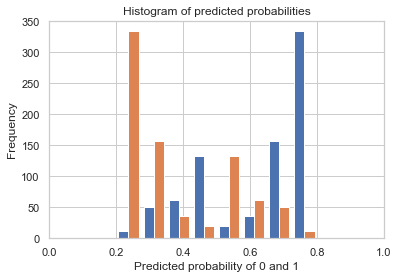

In [116]:
plt.hist(y_preds_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of 0 and 1')
plt.ylabel('Frequency')

In [117]:
print(y_preds_prob[0:10])

#The first [.88, .11] in y_pred denotes 88% probability that the first 
#sample has label 0. The log loss is non-negative.


[[0.76901047 0.23098953]
 [0.28804317 0.71195683]
 [0.4986798  0.5013202 ]
 [0.35185014 0.64814986]
 [0.77844833 0.22155167]
 [0.74025365 0.25974635]
 [0.66806724 0.33193276]
 [0.74463165 0.25536835]
 [0.49191505 0.50808495]
 [0.46955169 0.53044831]]


In [118]:
Y_label[0:10]


0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
10    1
Name: Survived, dtype: int64

In [119]:
# store the predicted probabilities for class 1
y_pred_prob_survive = logistic_model.predict_proba(X = X_data)[:, 1]
logistic_model.classes_


array([0, 1])

In [120]:
y_pred_prob_survive[0:10]


array([0.23098953, 0.71195683, 0.5013202 , 0.64814986, 0.22155167,
       0.25974635, 0.33193276, 0.25536835, 0.50808495, 0.53044831])

# ROC CURVE

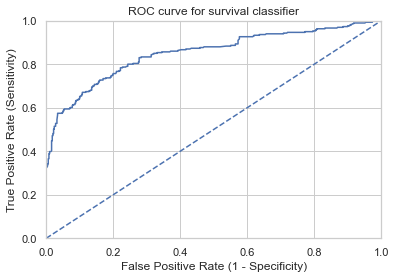

In [121]:
fpr, tpr, thresholds = metrics.roc_curve(Y_label,
                                         y_pred_prob_survive)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for survival classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.plot([0,1],[0,1],'b--')

In [122]:
print(metrics.roc_auc_score(Y_label, y_pred_prob_survive))


0.8514565553278824


In [123]:
print(thresholds)


[1.7503742  0.7503742  0.71886918 0.71831498 0.58418909 0.58294713
 0.58207856 0.58205601 0.58008647 0.58007272 0.57888873 0.57886213
 0.57807688 0.57802969 0.57736278 0.57672168 0.57587673 0.57574164
 0.57228927 0.57183079 0.57112798 0.57094476 0.56781841 0.56450279
 0.5643189  0.56151823 0.56118138 0.5595186  0.55785449 0.55772997
 0.55395454 0.55344673 0.55321341 0.55266884 0.55145284 0.55064089
 0.54818261 0.54693539 0.54583254 0.54569471 0.54564577 0.54562576
 0.54561684 0.53528951 0.53330228 0.53149599 0.52998535 0.52939917
 0.52653617 0.52585234 0.52147287 0.52082596 0.51631935 0.51360903
 0.51255684 0.51177564 0.51034459 0.50976378 0.50950125 0.50910012
 0.50865998 0.50808495 0.50798826 0.50783805 0.50697303 0.50677876
 0.50624198 0.50603701 0.50586611 0.50546469 0.50539042 0.50510501
 0.50433158 0.50385118 0.50364938 0.50208315 0.5012821  0.50116003
 0.50039404 0.49970011 0.49834237 0.49750989 0.4852004  0.47103112
 0.4555056  0.44017953 0.43182847 0.41929253 0.41371252 0.4136

In [124]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds >= threshold][-1])
    print('Specificity:', 1 - fpr[thresholds >= threshold][-1])
    

In [125]:
tpr[thresholds >= 0.6]

array([0.        , 0.00332226, 0.05647841, 0.06312292])

In [131]:

evaluate_threshold(0.3)


Sensitivity: 0.8305647840531561
Specificity: 0.7225548902195609


In [132]:
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise


y_pred_class = binarize(y_preds_prob, 0.3)



In [133]:

y_pred_class[:,1]


array([0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1.

In [134]:
print(metrics.classification_report(y_true=Y_label,
                              y_pred=y_pred_class[:,1]) )


              precision    recall  f1-score   support

           0       0.88      0.72      0.79       501
           1       0.64      0.83      0.72       301

    accuracy                           0.76       802
   macro avg       0.76      0.78      0.76       802
weighted avg       0.79      0.76      0.77       802



# PRECISION RECALL CURVE

In [135]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(Y_label,y_pred_prob_survive)




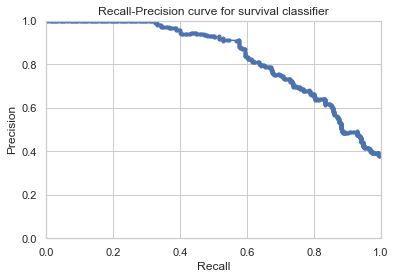

In [136]:
plt.plot(recall, precision, marker='.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Recall-Precision curve for survival classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
#plt.show()

In [137]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
# priors=[0.8,0.2]
nb_model.fit(X_data, Y_label)

GaussianNB()

In [138]:
logistic_model.score(X = X_data ,
                y = Y_label)

0.8092269326683291